# Réseau de neurones pour classer les appartements

In [15]:
import tensorflow as tf
import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

In [19]:
housing = fetch_california_housing()
X_train,X_test,y_train,y_test = train_test_split(housing.data,housing.target,test_size=0.2,random_state=42)
print(y_train)
print(X_train.shape)

[1.03  3.821 1.726 ... 2.221 2.835 3.25 ]
(16512, 8)


In [26]:
tf.random.set_seed(42)
norm_layer = keras.layers.Normalization(input_shape = X_train.shape[1:])
model = keras.Sequential(
    [norm_layer,
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(1)]
)
norm_layer.adapt(X_train)
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['RootMeanSquaredError'])
history = model.fit(X_train,y_train,epochs=30,validation_split=0.2)

Epoch 1/30
413/413 [==============================] - 1s 1ms/step - loss: 0.9015 - root_mean_squared_error: 0.9495 - val_loss: 0.4700 - val_root_mean_squared_error: 0.6855
Epoch 2/30
413/413 [==============================] - 0s 1ms/step - loss: 0.4061 - root_mean_squared_error: 0.6373 - val_loss: 0.4081 - val_root_mean_squared_error: 0.6389
Epoch 3/30
413/413 [==============================] - 0s 1ms/step - loss: 0.3635 - root_mean_squared_error: 0.6029 - val_loss: 0.3873 - val_root_mean_squared_error: 0.6224
Epoch 4/30
413/413 [==============================] - 0s 1ms/step - loss: 0.3501 - root_mean_squared_error: 0.5917 - val_loss: 0.3731 - val_root_mean_squared_error: 0.6108
Epoch 5/30
413/413 [==============================] - 0s 1ms/step - loss: 0.3414 - root_mean_squared_error: 0.5843 - val_loss: 0.3695 - val_root_mean_squared_error: 0.6079
Epoch 6/30
413/413 [==============================] - 0s 1ms/step - loss: 0.3271 - root_mean_squared_error: 0.5720 - val_loss: 0.3487 - val_

In [27]:
y_pred = model.predict(X_test)

129/129 [==============================] - 0s 814us/step


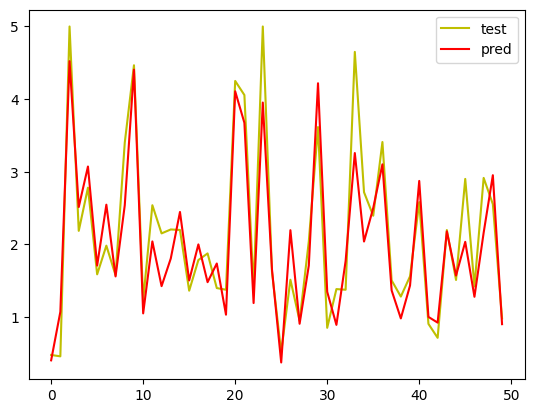

129/129 [==============================] - 0s 847us/step - loss: 0.2858 - root_mean_squared_error: 0.5346
[0.2857874631881714, 0.5345909595489502]


In [28]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(y_test[:50], c="y", label = "test")
plt.plot(y_pred[:50], c="r", label = "pred")
plt.legend()
plt.show()
print(model.evaluate(X_test,y_test))